# Data Augmentation for object detection for multiple images

In [5]:
from data_aug.data_aug import *
from data_aug.bbox_util import *
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
%matplotlib inline

import xml.etree.ElementTree as ET #manipular xml
from pascal_voc_writer import Writer #escrever formato pascal voc
import imageio #salvar imagem
import random
import glob

In [6]:
#funcao para ler xml / adicionei pegar classes
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []
    classes = []
    
    for boxes in root.iter('object'):
        
        for box in boxes.findall("name"):
            classes.append(box.text)

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        for box in boxes.findall("bndbox"):
            ymin = int(box.find("ymin").text)
            xmin = int(box.find("xmin").text)
            ymax = int(box.find("ymax").text)
            xmax = int(box.find("xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes, classes

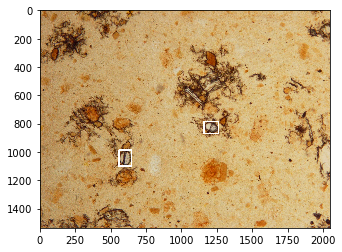

Ancilostomideo 5.JPG
(1536, 2048, 3)
[[ 557.  987.  647. 1099.    0.]
 [1158.  785. 1261.  869.    0.]]


In [3]:
img = cv2.imread("Ancilostomideo Original/Ancilostomideo 5.JPG")[:,:,::-1]   #opencv loads images in bgr. the [:,:,::-1] does bgr -> rgb
plotted_img = draw_rect(img, anotacoes)
plt.imshow(plotted_img)
plt.show()

print(name)
print(img.shape)
print(anotacoes)

In [90]:
#aplicando data augmentation
#imgNew, anotacoesNew = RandomHorizontalFlip(1)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomScale(0.8, diff = True)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomTranslate(0.3, diff = True)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomRotate(180)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomShear(0.2)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = Resize(500)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomHSV(100, 100, 100)(img.copy(), anotacoes.copy())

#para combinar os metodos use sequence

# HORIZONTAL TREINO
# pegar nomes dos arquivos nas pastas para o treino
treino_jpg = glob.glob("dataset2/test/*.jpg")
treino_xml = glob.glob("dataset2/test/*.xml")
treino_jpg.sort()
treino_xml.sort()

print(len(treino_jpg))
print(len(treino_xml))

28
28


In [91]:
#aplicando data augmentation
#imgNew, anotacoesNew = RandomHorizontalFlip(1)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomScale(0.8, diff = True)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomTranslate(0.3, diff = True)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomRotate(180)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomShear(0.2)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = Resize(500)(img.copy(), anotacoes.copy())
#imgNew, anotacoesNew = RandomHSV(100, 100, 100)(img.copy(), anotacoes.copy())

#para combinar os metodos use sequence

#aplicar horizontal nas imagens originais do treino
for i in range(len(treino_jpg)):
    # pegar arquivo xml e imagem atual
    name, boxes, classes = read_content(treino_xml[i])
    boxes = np.asarray(boxes)
    z = np.zeros((boxes.shape[0],1))
    anotacoes = np.append(boxes, z, axis=1)
    img = cv2.imread(treino_jpg[i])[:,:,::-1]
    
    #aplicando DA
    #imgNew, anotacoesNew = RandomRotate((270,270))(img.copy(), anotacoes.copy())
    imgNew, anotacoesNew = RandomHorizontalFlip(1)(img.copy(), anotacoes.copy())
    #pegando novo nome
    nameNew = os.path.splitext(name)[0]
    nameNew = nameNew + '_hor' + '.jpg'
    #salvar nova imagem - especificar caminho se é TRAIN ou VALIDATION
    imageio.imwrite('dataset2/test/'+str(nameNew), imgNew)
    
    # Writer(path, width, height)
    writer = Writer(nameNew, imgNew.shape[1], imgNew.shape[0])
    
    # ::addObject(name, xmin, ymin, xmax, ymax)
    for k in range(anotacoesNew.shape[0]):
        writer.addObject(classes[k], int(anotacoesNew[k,0]), int(anotacoesNew[k,1]),
                         int(anotacoesNew[k,2]), int(anotacoesNew[k,3]))

    # ::save(path)
    writer.save('dataset2/test/'+os.path.splitext(nameNew)[0]+'.xml')